<a href="https://colab.research.google.com/github/abhimanyubhowmik/ML_Fundamentals/blob/main/Linear_Algebra/Affine_Transformations_and_Eigenvectors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Affine Transformations

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import torch

Hadrien Jean's `plotVectors()` function from [this notebook](https://github.com/hadrienj/deepLearningBook-Notes/blob/master/2.7%20Eigendecomposition/2.7%20Eigendecomposition.ipynb).

In [ ]:

def plotVectors(vecs, cols, alpha=1):
    """
    Plot set of vectors.

    Parameters
    ----------
    vecs : array-like
        Coordinates of the vectors to plot. Each vectors is in an array. For
        instance: [[1, 3], [2, 2]] can be used to plot 2 vectors.
    cols : array-like
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
    alpha : float
        Opacity of vectors

    Returns:

    fig : instance of matplotlib.figure.Figure
        The figure of the vectors
    """
    plt.axvline(x=0, color='#A9A9A9', zorder=0)
    plt.axhline(y=0, color='#A9A9A9', zorder=0)

    for i in range(len(vecs)):
        if (isinstance(alpha, list)):
            alpha_i = alpha[i]
        else:
            alpha_i = alpha
        x = np.concatenate([[0,0],vecs[i]])
        plt.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=cols[i],
                  alpha=alpha_i)

(-1.0, 5.0)

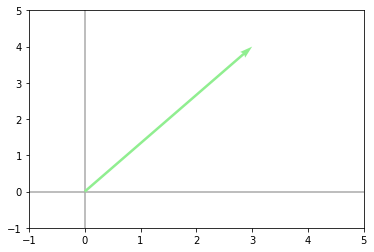

In [ ]:
A = np.array([[2,4],[5,6]])
x = np.array([3,4])
plotVectors([x],['lightgreen'])
plt.xlim(-1, 5)
plt.ylim(-1, 5)

In [ ]:
y = np.dot(A,x)

(-1.0, 40.0)

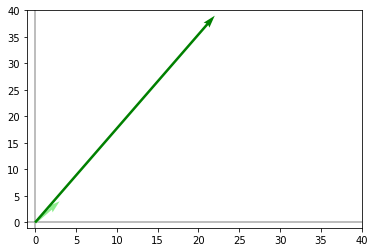

In [ ]:
plotVectors([x,y],['lightgreen','green'])
plt.xlim(-1, 40)
plt.ylim(-1, 40)

Flipping vextor over $x$ axis.

In [ ]:
E = np.array([[1,0],[0,-1]])
E

array([[ 1,  0],
       [ 0, -1]])

(-5.0, 5.0)

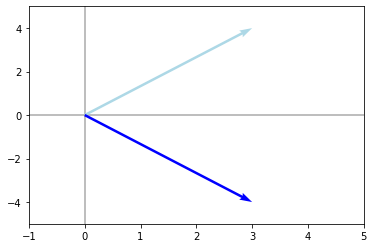

In [ ]:
x_ref = np.dot(E,x)
plotVectors([x,x_ref],['lightblue','blue'])
plt.xlim(-1, 5)
plt.ylim(-5, 5)

Flipping vextor over $y$ axis.

In [ ]:
F = np.array([[-1,0],[0,1]])
F

array([[-1,  0],
       [ 0,  1]])

(-1.0, 5.0)

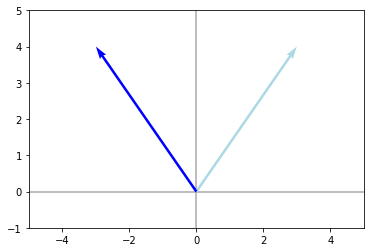

In [ ]:
y_ref = np.dot(F,x)
plotVectors([x,y_ref],['lightblue','blue'])
plt.xlim(-5, 5)
plt.ylim(-1, 5)

Concatenate several vectors together into a matrix, where each column is a separate vector. Then, whatever linear transformations we apply to the matrix will be independently applied to each column (vector): 

In [ ]:
v1 = np.array([2,3])
v2 = np.array([7,1])
v3 = np.array([3,7])

In [ ]:
V = np.concatenate((np.matrix(v1).T,np.matrix(v2).T,np.matrix(v3).T),axis=1)
V

matrix([[2, 7, 3],
        [3, 1, 7]])

In [ ]:
B = np.array([[2,5],[-6,1]])
B

array([[ 2,  5],
       [-6,  1]])

In [ ]:
def vectorify(matrix,column):
  return np.array(matrix[:,column]).reshape(-1)

In [ ]:
vectorify(V,0)

array([2, 3])

In [ ]:
BV = np.dot(B,V)
BV

matrix([[ 19,  19,  41],
        [ -9, -41, -11]])

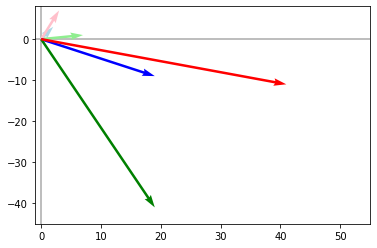

In [ ]:
plotVectors([vectorify(V,0),vectorify(V,1),vectorify(V,2),
             vectorify(BV,0),vectorify(BV,1),vectorify(BV,2)],
            ['lightblue','lightgreen','pink',
             'blue','green','red'])
plt.xlim(-1, 55)
_ = plt.ylim(-45, 8)

## Eigenvectors and Eigenvalues

In [ ]:
A = np.array([[-1,4],[2,-2]])

In [ ]:
lambdas, V = np.linalg.eig(A)

In [ ]:
V

array([[ 0.86011126, -0.76454754],
       [ 0.51010647,  0.64456735]])

In [ ]:
lambdas

array([ 1.37228132, -4.37228132])

In [ ]:
Av1 = np.dot(A,V[:,0])
Av2 = np.dot(A,V[:,1])

(-3.0, 1.0)

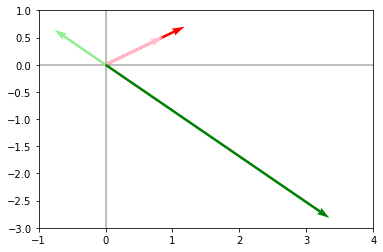

In [ ]:
plotVectors([Av1,V[:,0],Av2,V[:,1]],['red','pink','green','lightgreen'])
plt.xlim(-1,4)
plt.ylim(-3,1)

In [ ]:
B = torch.tensor([[4,-3],[6,2.]])

In [ ]:
eigens = torch.eig(B,eigenvectors=True)
eigens

torch.return_types.eig(eigenvalues=tensor([[ 3.0000,  4.1231],
        [ 3.0000, -4.1231]]), eigenvectors=tensor([[0.1361, 0.5611],
        [0.8165, 0.0000]]))